In [5]:
! pip install -q scikit-plot

# **Import**

In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string

In [7]:
import sys
#filePath = '/Users/pratiksayanekar/Documents/DL_20200161'
filePath = '/content/drive/My Drive/DeepLearning'
sys.path.append(filePath)

In [8]:
from utils.basic_utilities import Utils
from models.LSTM_1 import LSTM_Model
from models.CNN_1 import CNN_Model
from models.Word2Vec_1 import Word2VecModel
from models.BiLSTM import BiLSTM_Model

In [9]:
from sklearn.metrics import classification_report

# **Reading Preprocessed Data**

In [10]:
df = pd.read_csv('{}/Data/preprocessed_data.csv'.format(filePath))
df.head()

,emotion,content,original_content,text
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat nsorry spot disappointedface,b'RT @Davbingodav: @mcrackins Oh fuck.... did I wrote Fil ??? :grinning_face_with_sweat:\nSorry Spot. :disappointed_face:',rt oh fuck wrote fil grinning_face_with_sweatnsorry spot isappointed_face
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,feel shamed
2,disappointed,i had been feeling a little bit defeated by the step of faith we would need to take to try to resolve our problem,i had been feeling a little bit defeated by the steps of faith we would need to take to try to resolve our problem,feeling little bit defeated steps faith need try resolve problem
3,happy,imagine if that reaction guy that called jj kfc saw this my man would ve started cry lmao,"b""@KSIOlajidebt imagine if that reaction guy that called JJ KFC saw this. my man would've started crying lmao """,imagine reaction guy called jj kfc saw man ve started crying lmao
4,disappointed,i wouldnt feel burdened so that i would live my life a a testament to his sacrifice that wa out of a love so pure and innocent yet so great and mighty,i wouldnt feel burdened so that i would live my life as a testament to his sacrifice that was out of a love so pure and innocent yet so great and mighty,wouldnt feel burdened live life testament sacrifice love pure innocent great mighty


In [11]:
df.text = df.text.astype(str)

# **Splitting dataset into train(80%) and test(20%)**

In [12]:
util = Utils()
X_train, X_test, y_train, y_test = util.split_data(df)
print("The shape of train data: ",X_train.shape)
print("The shape of train target: ",y_train.shape)
print("The shape of test data: ",X_test.shape)
print("The shape of test target: ",y_test.shape)

Initialization of Utilities...
The shape of train data:  (733260,)
The shape of train target:  (733260,)
The shape of test data:  (183315,)
The shape of test target:  (183315,)


# **Tokenization and Padding of each tweet**

In [13]:
max_len = util.max_len(df)
print("Maximum length of tweet:", max_len)

Maximum length of tweet: 122


In [14]:
train_converted, test_converted = util.tokenization_padding(X_train, X_test, max_len)
print("After Tokenization and Padding...")
print("The shape of train data: ", train_converted.shape)
print("The shape of test data: ", test_converted.shape)

After Tokenization and Padding...
The shape of train data:  (733260, 122)
The shape of test data:  (183315, 122)


In [15]:
target_converted_train, target_converted_test = util.one_hot_target_variable(y_train, y_test)
print("After one hot encoding of target variable...")
print("The shape of train target: ", target_converted_train.shape)
print("The shape of test target: ", target_converted_test.shape)

After one hot encoding of target variable...
The shape of train target:  (733260, 3)
The shape of test target:  (183315, 3)


# **Deep Learning Models**

In [16]:
EPOCH = 30
BATCH_SIZE = 512

# **CNN Model**

In [17]:
cnn = CNN_Model()
model = cnn.create_model(embed_dim = 100, num_filters = 128, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.7, num_words=4)
model.summary()

CNN Model Initialization...
Model Created Successfully...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 122, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 128)          51328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 20,051,715
Trainable params: 20,051,715
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size=BATCH_SIZE, validation_split=0.2,
                    callbacks=cnn.callbacks)

Epoch 1/30
1146/1146 [==============================] - 251s 192ms/step - loss: 0.4474 - acc: 0.8022 - val_loss: 0.2376 - val_acc: 0.8965

Epoch 00001: val_loss improved from inf to 0.23755, saving model to /content/drive/My Drive/DeepLearning/checkpoints/CNN/
INFO:tensorflow:Assets written to: /content/drive/My Drive/DeepLearning/checkpoints/CNN/assets
Epoch 2/30
1146/1146 [==============================] - 221s 193ms/step - loss: 0.2334 - acc: 0.9030 - val_loss: 0.2300 - val_acc: 0.9004

Epoch 00002: val_loss improved from 0.23755 to 0.22998, saving model to /content/drive/My Drive/DeepLearning/checkpoints/CNN/
INFO:tensorflow:Assets written to: /content/drive/My Drive/DeepLearning/checkpoints/CNN/assets
Epoch 3/30
1146/1146 [==============================] - 220s 192ms/step - loss: 0.2110 - acc: 0.9132 - val_loss: 0.2283 - val_acc: 0.9005

Epoch 00003: val_loss improved from 0.22998 to 0.22834, saving model to /content/drive/My Drive/DeepLearning/checkpoints/CNN/
INFO:tensorflow:Ass

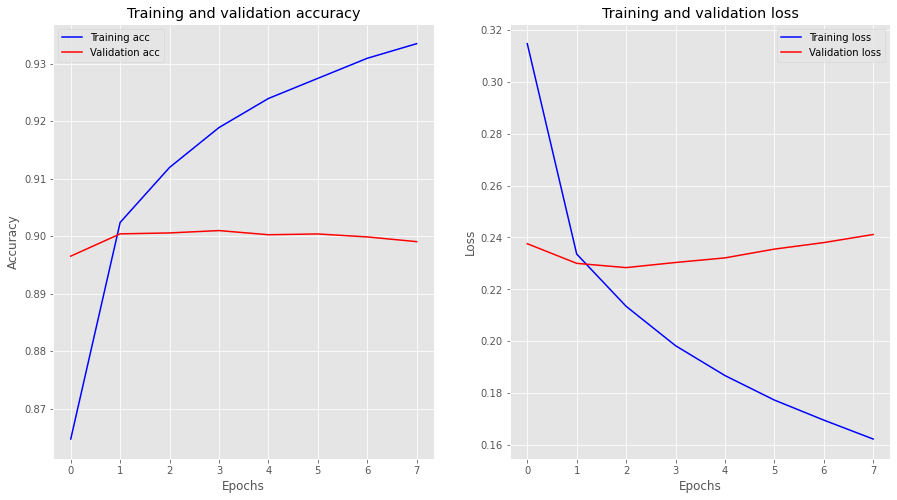

In [19]:
util.plot_accuracy_loss(history, 'CNN')

# **Evaluation**

In [20]:
model = cnn.load_saved_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 122, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 128)          51328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 20,051,715
Trainable params: 20,051,715
Non-trainable params: 0
_________________________________________________________________


In [21]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

359/359 - 3s - loss: 0.2307 - acc: 0.8997
The loss of this model: 0.23
The accuracy of this model: 0.90


In [22]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[53819  7486  2342]
 [ 5886 54596  1519]
 [  493   661 56513]]


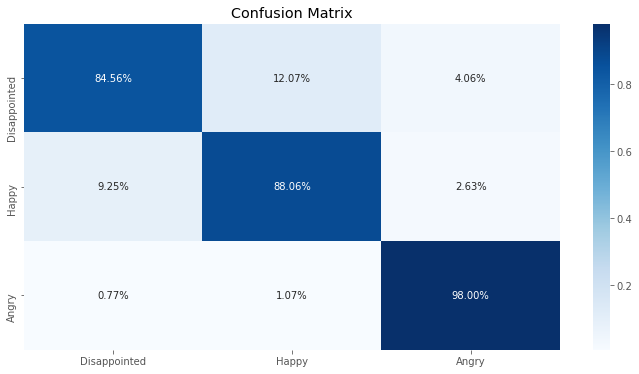

In [23]:
test,pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'CNN')

In [24]:
print("Classification Report: \n", classification_report(test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87     63647
           1       0.87      0.88      0.88     62001
           2       0.94      0.98      0.96     57667

    accuracy                           0.90    183315
   macro avg       0.90      0.90      0.90    183315
weighted avg       0.90      0.90      0.90    183315



# **CNN_v2**

In [25]:
cnn = CNN_Model()
model = cnn.create_model_v2(embed_dim = 100, num_filters = 128, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.7, num_words=4)
model.summary()

CNN Model Initialization...
Model Created Successfully...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 122, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 128)          51328     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 128)          65664     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 122, 128)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
______________________________________________________________

In [26]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size=BATCH_SIZE, validation_split=0.2,
                    callbacks=cnn.callbacks_v2)

Epoch 1/30
1146/1146 [==============================] - 229s 199ms/step - loss: 0.4713 - acc: 0.7774 - val_loss: 0.2346 - val_acc: 0.8959

Epoch 00001: val_loss improved from inf to 0.23460, saving model to /content/drive/My Drive/DeepLearning/checkpoints/CNN_v2/
INFO:tensorflow:Assets written to: /content/drive/My Drive/DeepLearning/checkpoints/CNN_v2/assets
Epoch 2/30
1146/1146 [==============================] - 229s 200ms/step - loss: 0.2411 - acc: 0.8977 - val_loss: 0.2273 - val_acc: 0.9008

Epoch 00002: val_loss improved from 0.23460 to 0.22730, saving model to /content/drive/My Drive/DeepLearning/checkpoints/CNN_v2/
INFO:tensorflow:Assets written to: /content/drive/My Drive/DeepLearning/checkpoints/CNN_v2/assets
Epoch 3/30
1146/1146 [==============================] - 231s 201ms/step - loss: 0.2186 - acc: 0.9083 - val_loss: 0.2260 - val_acc: 0.9015

Epoch 00003: val_loss improved from 0.22730 to 0.22603, saving model to /content/drive/My Drive/DeepLearning/checkpoints/CNN_v2/
INFO

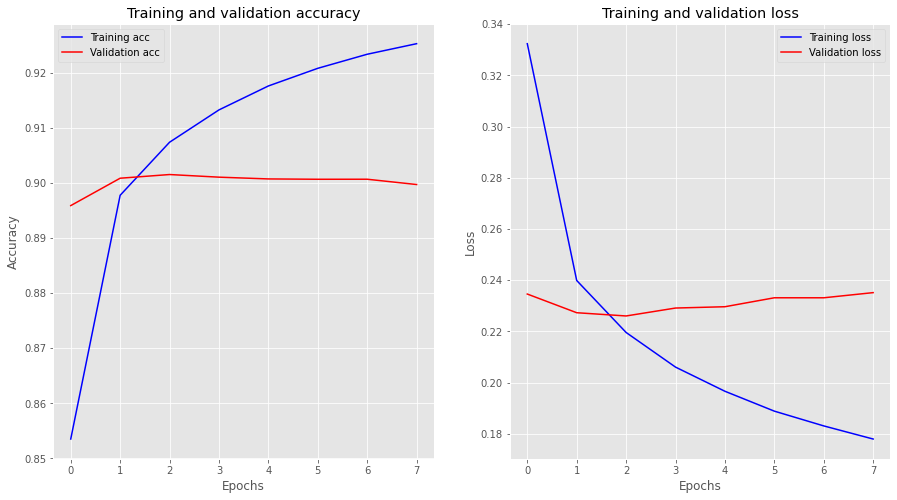

In [27]:
util.plot_accuracy_loss(history, 'CNN_v2')

# **Evaluation**

In [28]:
model = cnn.load_saved_model_v2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 122, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 128)          51328     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 128)          65664     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 122, 128)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [29]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

359/359 - 4s - loss: 0.2295 - acc: 0.9005
The loss of this model: 0.23
The accuracy of this model: 0.90


In [30]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[54599  8123  2555]
 [ 5225 54024  1362]
 [  374   596 56457]]


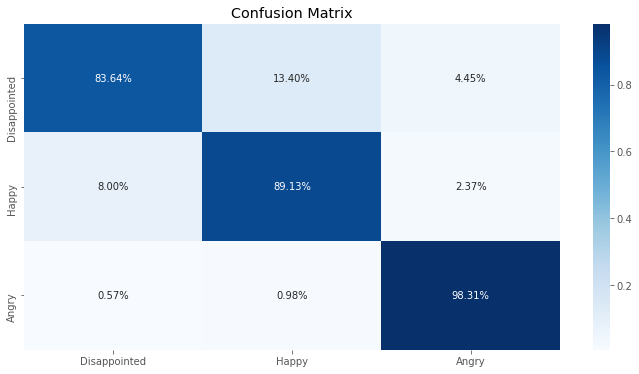

In [31]:
test,pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'CNN_v2')

In [32]:
print("Classification Report: \n", classification_report(test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     65277
           1       0.86      0.89      0.88     60611
           2       0.94      0.98      0.96     57427

    accuracy                           0.90    183315
   macro avg       0.90      0.90      0.90    183315
weighted avg       0.90      0.90      0.90    183315



# **LSTM Model**

In [33]:
lstm = LSTM_Model()
model = lstm.create_model(embed_dim = 100, lstm_out = 64, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.7)
model.summary()

LSTM Model Initialization...
Model Created Successfully...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 20,042,435
Trainable params: 20,042,435
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size= BATCH_SIZE, validation_split=0.2,
                    callbacks=lstm.callbacks)

Epoch 1/30
1146/1146 [==============================] - 674s 586ms/step - loss: 0.5706 - acc: 0.7413 - val_loss: 0.2523 - val_acc: 0.8927

Epoch 00001: val_loss improved from inf to 0.25230, saving model to /content/drive/My Drive/DeepLearning/checkpoints/LSTM/
INFO:tensorflow:Assets written to: /content/drive/My Drive/DeepLearning/checkpoints/LSTM/assets
Epoch 2/30
1146/1146 [==============================] - 671s 586ms/step - loss: 0.2765 - acc: 0.8846 - val_loss: 0.2380 - val_acc: 0.8977

Epoch 00002: val_loss improved from 0.25230 to 0.23797, saving model to /content/drive/My Drive/DeepLearning/checkpoints/LSTM/
INFO:tensorflow:Assets written to: /content/drive/My Drive/DeepLearning/checkpoints/LSTM/assets
Epoch 3/30
1146/1146 [==============================] - 671s 585ms/step - loss: 0.2474 - acc: 0.8978 - val_loss: 0.2310 - val_acc: 0.8993

Epoch 00003: val_loss improved from 0.23797 to 0.23096, saving model to /content/drive/My Drive/DeepLearning/checkpoints/LSTM/
INFO:tensorflo

In [ ]:
util.plot_accuracy_loss(history, 'LSTM')

# **Evaluation**

In [ ]:
model = lstm.load_saved_model()
model.summary()

In [ ]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

In [ ]:
y_pred = model.predict(test_converted)

In [ ]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'LSTM')

In [ ]:
print("Classification Report: ", classification_report(test, pred))

# **LSTM_v2**

In [ ]:
lstm = LSTM_Model()
model = lstm.create_model_v2(embed_dim = 100, lstm_out = 64, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.7)
model.summary()

In [ ]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size= BATCH_SIZE, validation_split=0.2,
                    callbacks=lstm.callbacks_v2)

In [ ]:
util.plot_accuracy_loss(history, 'LSTM_v2')

# **Evaluation**

In [ ]:
model = lstm.load_saved_model_v2()
model.summary()

In [ ]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

In [ ]:
y_pred = model.predict(test_converted)

In [ ]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'LSTM_v2')

In [ ]:
print("Classification Report: \n", classification_report(test, pred))

# **Word2Vec Model**

In [ ]:
word2vec = Word2VecModel()
word2vec_model = word2vec.create_model(X_train)

In [ ]:
train_converted, test_converted, tokenizer = util.tokenization_padding_oov_token(X_train, X_test, 60)
print("After Tokenization and Padding...")
print("The shape of train data: ", train_converted.shape)
print("The shape of test data: ", test_converted.shape)

In [ ]:
vocab_length = len(tokenizer.word_index) + 1
embedding_matrix = word2vec.create_embedding_matrix(vocab_length, tokenizer, word2vec_model)

# **BiLSTM**

In [ ]:
bi_lstm = BiLSTM_Model()
model = bi_lstm.create_model(embed_dim = 100, lstm_out = 100, input_len = train_converted.shape[1], 
                             feature = vocab_length, drop_out = 0.7, embedding_matrix = embedding_matrix)
model.summary()

In [ ]:
history = model.fit(train_converted, target_converted_train, batch_size=BATCH_SIZE, epochs=EPOCH,
                    validation_split=0.2, callbacks=bi_lstm.callbacks)

# **Evaluation**

In [ ]:
model = bi_lstm.load_saved_model()
print(model.summary())

In [ ]:
score, acc = model.evaluate(test_converted, target_converted_test, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

In [ ]:
util.plot_accuracy_loss(history, 'BiLSTM')

# **Prediction** 

In [ ]:
y_pred = model.predict(test_converted)

In [ ]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'BiLSTM')

In [ ]:
print("Classification Report: \n", classification_report(test, pred))